In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = "D:\\0-projects\\1- calorie prediction\\Data\\train.csv"
df = pd.read_csv(file_path)

In [4]:
# Example EDA
print("Dataframe Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst Few Rows:")
print(df.head())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
None

Summary Statistics:
                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000

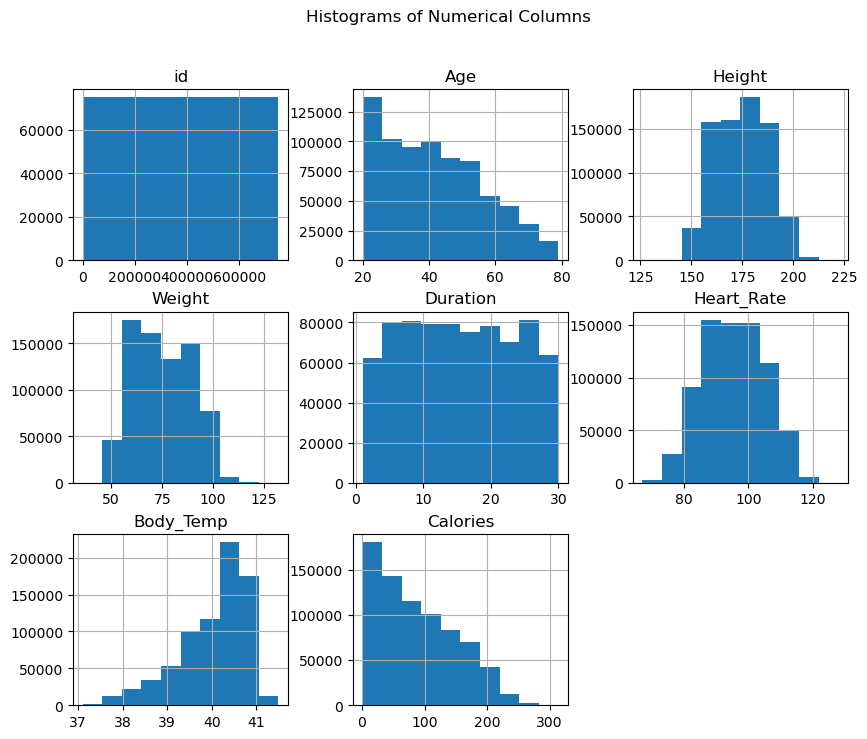

C:\Users\suman\AppData\Local\Temp\ipykernel_32924\341338439.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


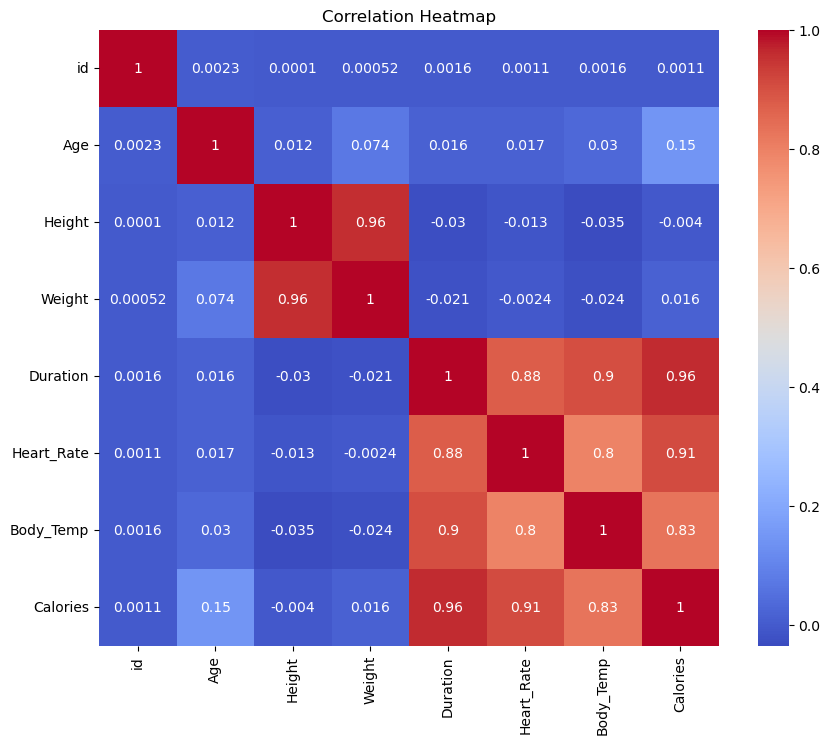

In [5]:

# Plot histogram for numerical columns
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Plot correlation heatmap using seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

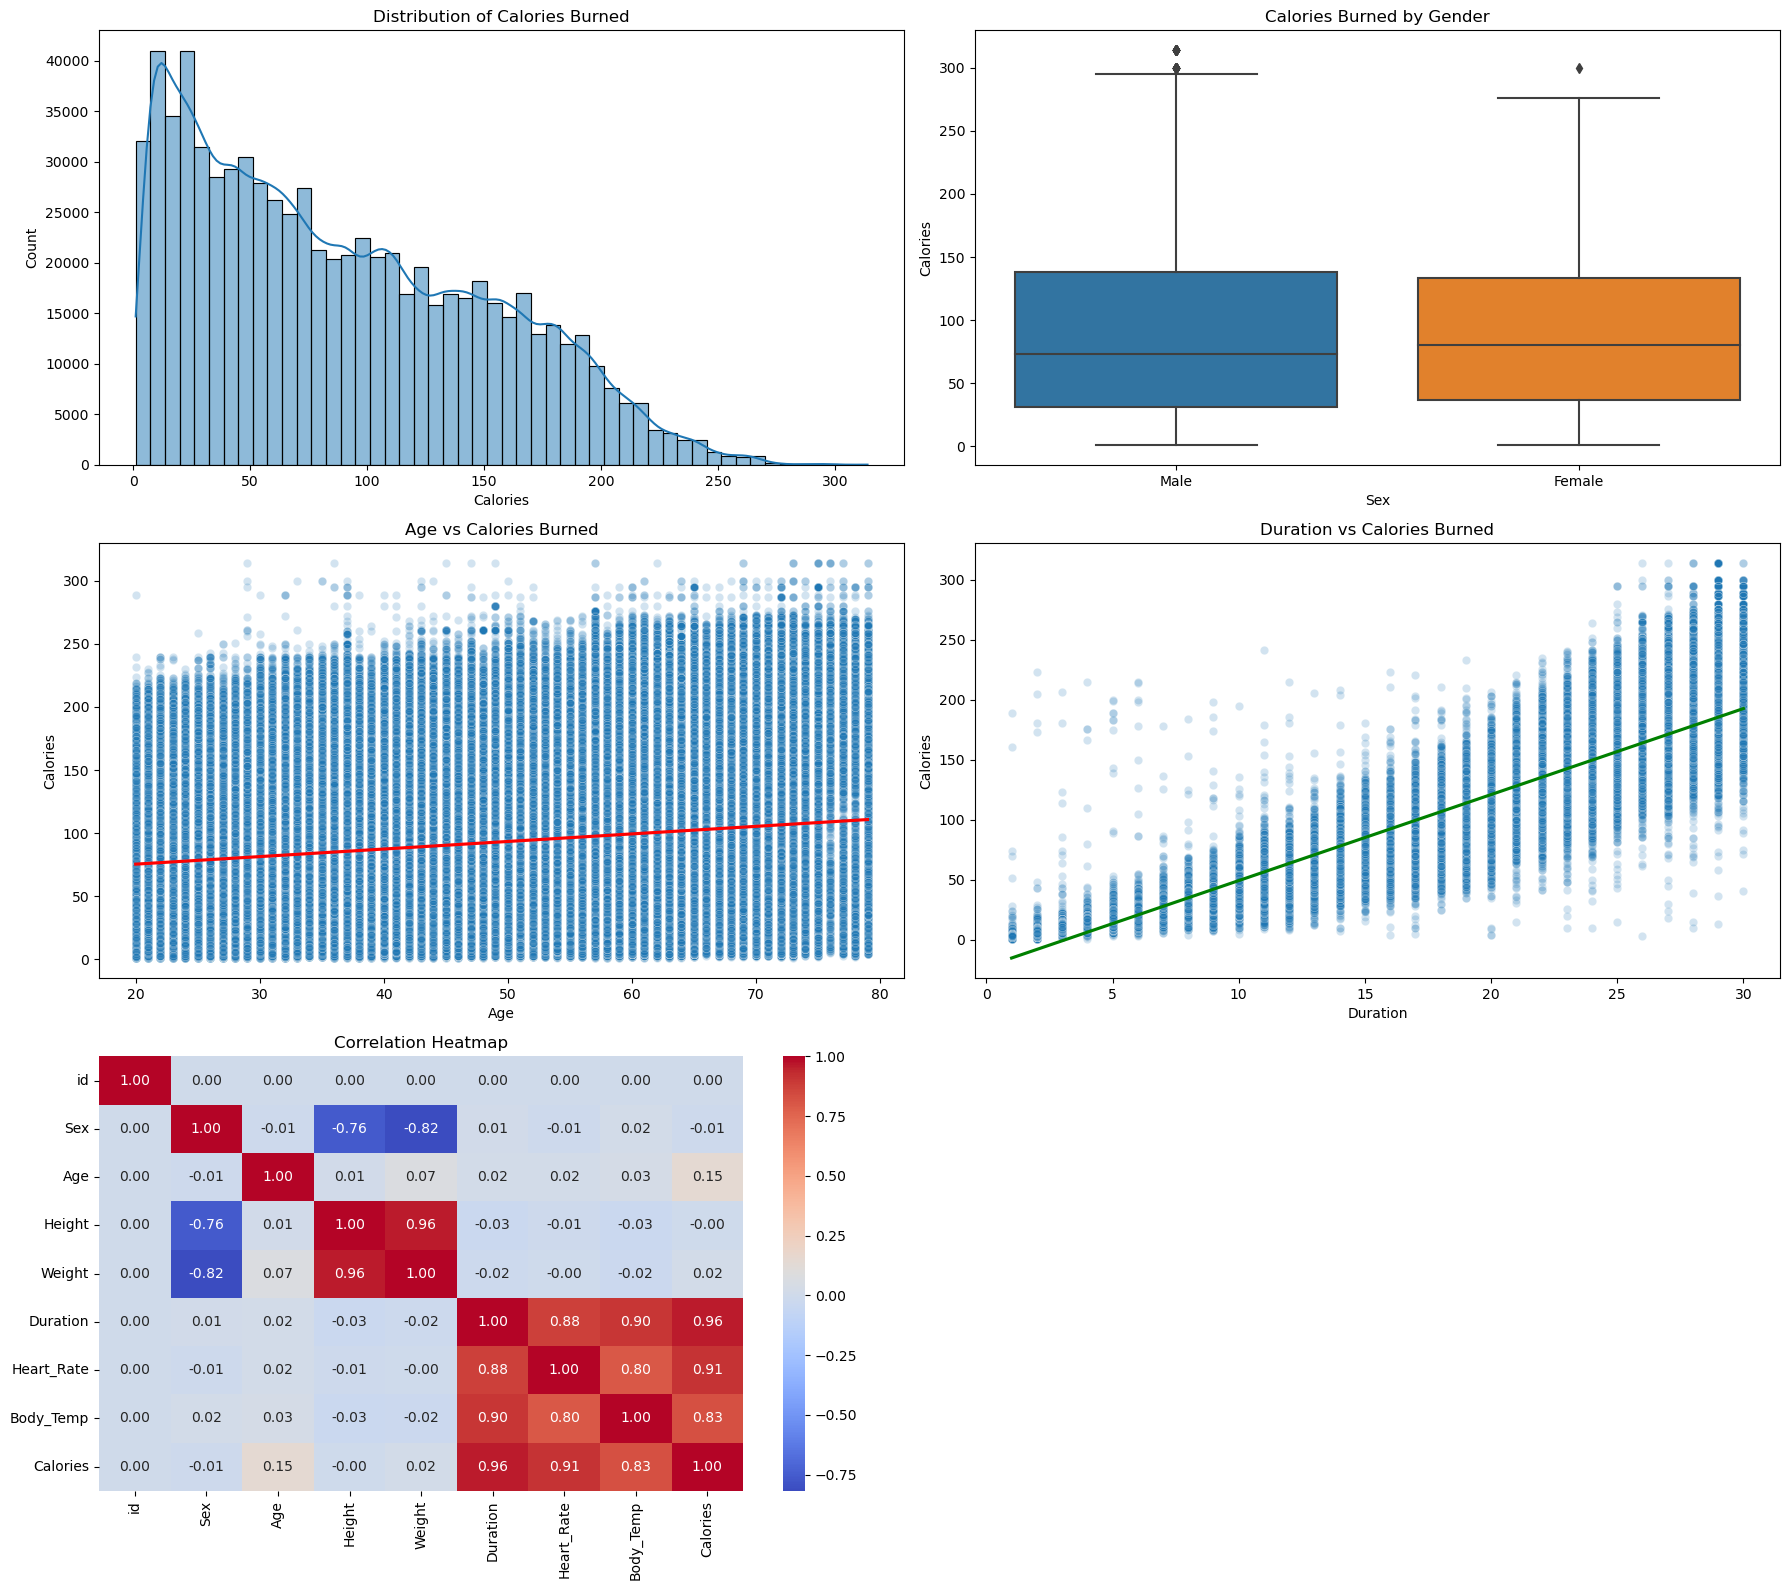

In [6]:
# Clean column names just in case
df.columns = df.columns.str.strip()

# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Correlation matrix
corr_matrix = df.corr()

# Plotting begins
plt.figure(figsize=(18, 16))

# 1. Distribution of Calories
plt.subplot(3, 2, 1)
sns.histplot(df['Calories'], kde=True, bins=50)
plt.title('Distribution of Calories Burned')

# 2. Calories by Gender
plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='Sex', y='Calories')
plt.title('Calories Burned by Gender')
plt.xticks([0, 1], ['Male', 'Female'])

# 3. Age vs Calories
plt.subplot(3, 2,  3)
sns.scatterplot(data=df, x='Age', y='Calories', alpha=0.2)
sns.regplot(data=df, x='Age', y='Calories', scatter=False, color='red')
plt.title('Age vs Calories Burned')

# 4. Duration vs Calories
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='Duration', y='Calories', alpha=0.2)
sns.regplot(data=df, x='Duration', y='Calories', scatter=False, color='green')
plt.title('Duration vs Calories Burned')

# 5. Correlation Heatmap
plt.subplot(3, 2, 5)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')

# Layout adjustment
plt.tight_layout()
plt.show()

In [12]:
# Separate features and target
X = df.drop(columns=['id', 'Calories'])
y = df['Calories']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


RMSLE: 0.0682


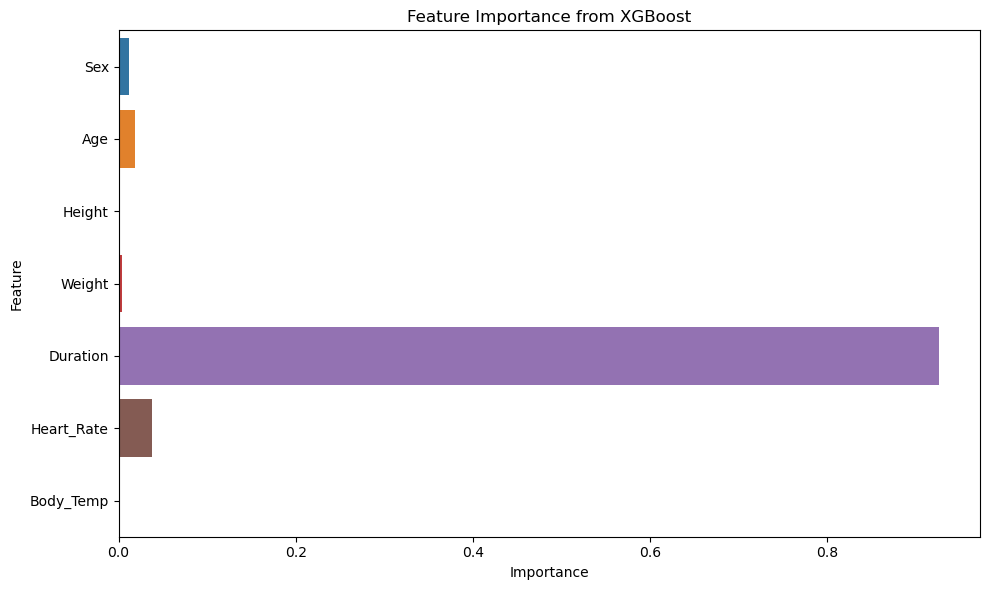

In [13]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbosity=1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)
y_pred = np.clip(y_pred, 0, None)  # Ensure predictions are non-negative

# Calculate RMSLE (Root Mean Squared Logarithmic Error)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=xgb_model.feature_importances_,
    y=X.columns
)
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [14]:
# Load the test dataset
test_path = "D:\\0-projects\\1- calorie prediction\\Data\\test.csv"
test_df = pd.read_csv(test_path)

# Backup test IDs (for submission)
test_ids = test_df['id']

# Encode 'Sex' just like training data
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

# Drop ID column before prediction
X_test = test_df.drop(columns=['id'])

In [15]:
# Predict on test set
test_preds = xgb_model.predict(X_test)
test_preds = np.clip(test_preds, 0, None)  # Make sure no negatives


In [16]:
# Create submission dataframe
submission = pd.DataFrame({
    'id': test_ids,
    'Calories': test_preds
})

# Save as CSV
submission.to_csv("D:\\0-projects\\1- calorie prediction\\submission.csv", index=False)
print("Submission file created successfully!")


Submission file created successfully!
